# Gap filling - when is the effect of L?

In [1]:
#importing required packages
import pandas as pd
import numpy as np
import copy
import os
import warnings
warnings.filterwarnings('ignore')
os.chdir('../../..')
home_path = os.path.abspath('')
from pycissa import Cissa

In [2]:
## Read data file  (source is the Ministry of Economy of Spain.)
data = pd.read_excel(home_path + r'/data/EPC.xlsx',sheet_name = 'Data')

In [3]:
data_with_gaps = copy.deepcopy(data)
data_with_gaps['Electric power consumption in Spain'][100] = np.nan
data_with_gaps['Electric power consumption in Spain'][200] = np.nan
data_with_gaps['Electric power consumption in Spain'][300] = np.nan
data_with_gaps['Electric power consumption in Spain'][400] = np.nan
data_with_gaps['Electric power consumption in Spain'][500] = np.nan
print(data_with_gaps['Electric power consumption in Spain'][499:502])

499    21425.56417
500            NaN
501    19817.63946
Name: Electric power consumption in Spain, dtype: float64


## L = 12 (1 year)

Step 0 of 20
iteration 0.  4474.949988235068  vs target error:  50
iteration 1.  1630.7892191372666  vs target error:  50
iteration 2.  686.0682435348826  vs target error:  50
iteration 3.  321.4074118511362  vs target error:  50
iteration 4.  227.87200346187092  vs target error:  50
iteration 5.  161.1600481883288  vs target error:  50
iteration 6.  113.80477538540799  vs target error:  50
iteration 7.  80.28995499349912  vs target error:  50
iteration 8.  56.613398173964015  vs target error:  50
iteration 9.  39.905332896621985  vs target error:  50
Step 1 of 20
iteration 0.  3507.6686096697485  vs target error:  50
iteration 1.  1461.528587362398  vs target error:  50
iteration 2.  994.9385466682143  vs target error:  50
iteration 3.  685.7609765469533  vs target error:  50
iteration 4.  473.9440049222212  vs target error:  50
iteration 5.  329.3683856824755  vs target error:  50
iteration 6.  229.8331168823861  vs target error:  50
iteration 7.  160.7967262996317  vs target error: 

iteration 0.  3907.4924803408794  vs target error:  50
iteration 1.  1701.6112208465602  vs target error:  50
iteration 2.  804.2477521838409  vs target error:  50
iteration 3.  483.01331241023945  vs target error:  50
iteration 4.  326.49858819345536  vs target error:  50
iteration 5.  224.11789325831342  vs target error:  50
iteration 6.  155.42382337767413  vs target error:  50
iteration 7.  108.48044460447272  vs target error:  50
iteration 8.  76.5473170430705  vs target error:  50
iteration 9.  54.00303522020113  vs target error:  50
iteration 10.  38.086436564579344  vs target error:  50
Step 14 of 20
iteration 0.  3963.0697835070096  vs target error:  50
iteration 1.  1666.4683079981041  vs target error:  50
iteration 2.  757.5416635173824  vs target error:  50
iteration 3.  400.2725084020203  vs target error:  50
iteration 4.  229.01151790634322  vs target error:  50
iteration 5.  132.98634557877813  vs target error:  50
iteration 6.  78.65080103414948  vs target error:  50
it

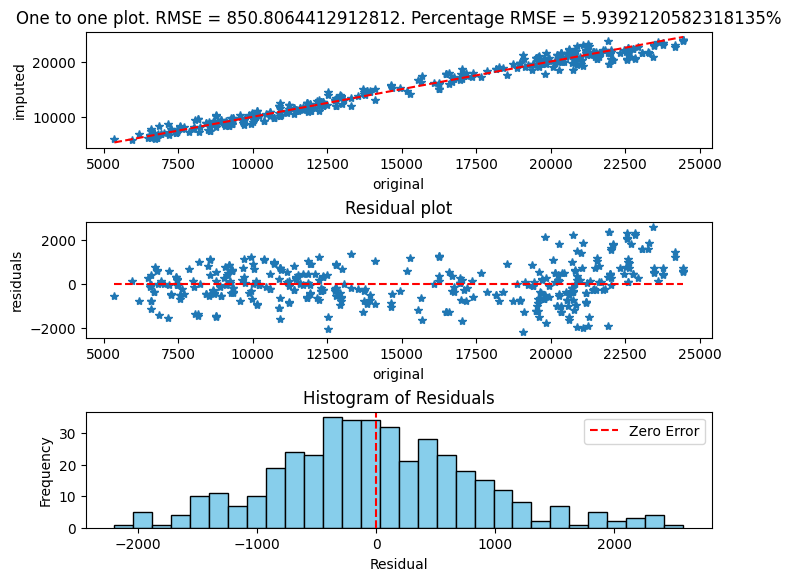

In [4]:
#create the cissa object
cissa_object_L_12 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_12.pre_fill_gaps(L = 12*1,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = True    
                       )
cissa_object_L_12.figures.get('cissa').get('figure_gap_fill_error')

In [5]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_12.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_12.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_12.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_12.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_12.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_12.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_12.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_12.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_12.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_12.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8542.088619162814 percentage error =  1.591108279039498
true:  11537.2 , imputed:  11176.752008186757 percentage error =  3.1242241775581925
true:  17861.48079 , imputed:  16916.131811405918 percentage error =  5.292668562638718
true:  20942.10015 , imputed:  21296.665535122265 percentage error =  -1.693074632356139
true:  20808.25338 , imputed:  20674.132343694004 percentage error =  0.644556916222992


## L = 24 (2 years)

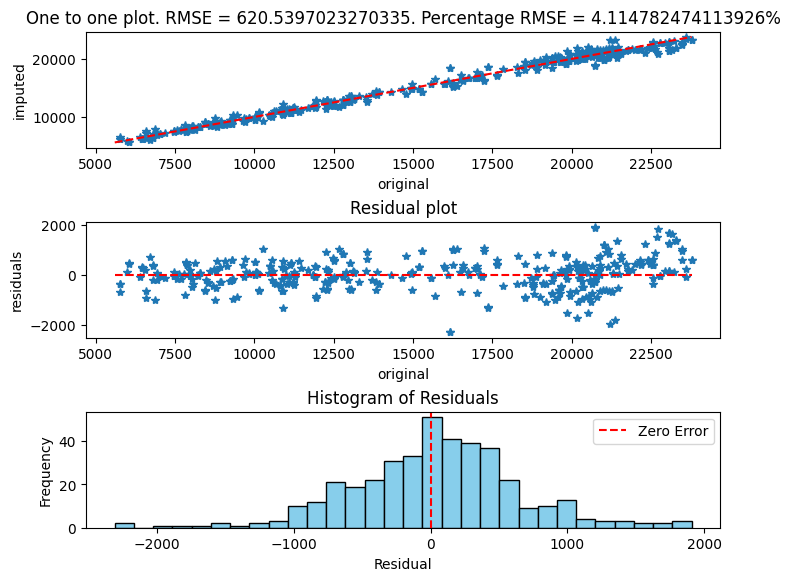

In [6]:
#create the cissa object
cissa_object_L_24 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_24.pre_fill_gaps(L = 12*2,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_24.figures.get('cissa').get('figure_gap_fill_error')

In [7]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_24.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_24.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_24.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_24.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_24.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_24.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_24.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_24.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_24.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_24.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8556.655716474368 percentage error =  1.4232884441099587
true:  11537.2 , imputed:  11120.282276082038 percentage error =  3.613682036525002
true:  17861.48079 , imputed:  16924.67453853348 percentage error =  5.244840909220727
true:  20942.10015 , imputed:  20668.59507595445 percentage error =  1.3060059501508405
true:  20808.25338 , imputed:  20459.996218140506 percentage error =  1.6736491790042403


## L = 36 (3 years)

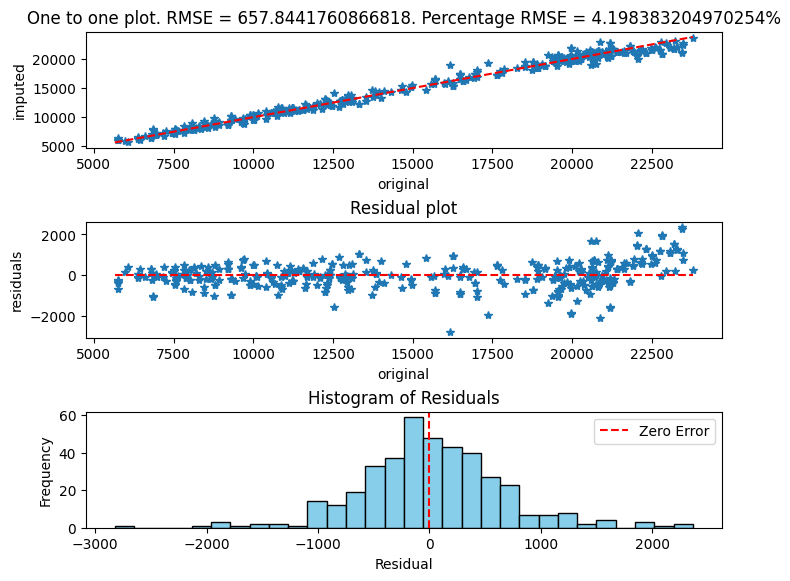

In [8]:
#create the cissa object
cissa_object_L_36 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_36.pre_fill_gaps(L = 12*3,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_36.figures.get('cissa').get('figure_gap_fill_error')

In [9]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_36.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_36.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_36.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_36.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_36.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_36.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_36.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_36.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_36.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_36.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8555.370792731714 percentage error =  1.438091371953262
true:  11537.2 , imputed:  11047.97602634651 percentage error =  4.2404047225799175
true:  17861.48079 , imputed:  16896.532523658 percentage error =  5.402397918106778
true:  20942.10015 , imputed:  20498.41319006657 percentage error =  2.1186364154286013
true:  20808.25338 , imputed:  20444.44743957153 percentage error =  1.7483732718198408


## L = 48 (4 years)

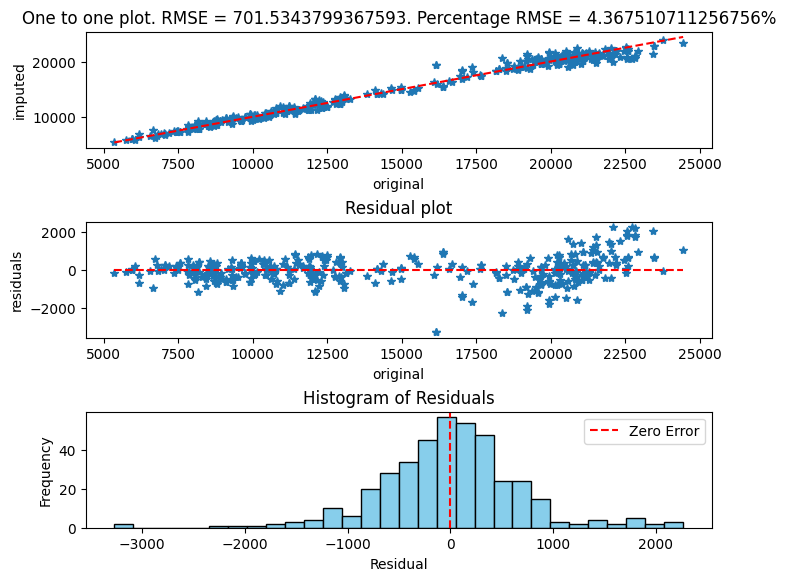

In [10]:
#create the cissa object
cissa_object_L_48 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_48.pre_fill_gaps(L = 12*4,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_48.figures.get('cissa').get('figure_gap_fill_error')

In [11]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_48.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_48.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_48.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_48.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_48.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_48.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_48.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_48.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_48.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_48.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8204.967637634938 percentage error =  5.474901066393201
true:  11537.2 , imputed:  10998.142903094295 percentage error =  4.672339015581824
true:  17861.48079 , imputed:  17079.272996147683 percentage error =  4.379299807495513
true:  20942.10015 , imputed:  19866.978992436427 percentage error =  5.133779085492396
true:  20808.25338 , imputed:  20425.91942928748 percentage error =  1.837414912872983


## L = 60 (5 years)

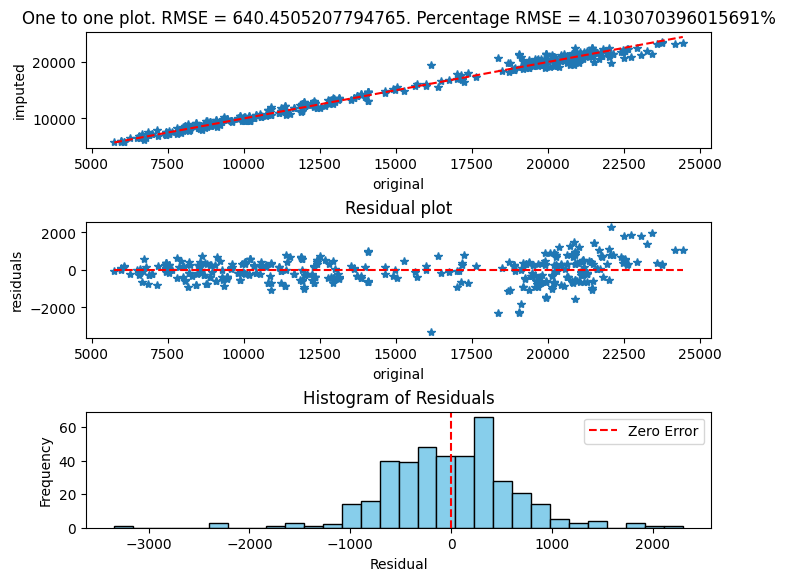

In [12]:
#create the cissa object
cissa_object_L_60 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_60.pre_fill_gaps(L = 12*5,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_60.figures.get('cissa').get('figure_gap_fill_error')

In [13]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_60.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_60.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_60.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_60.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_60.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_60.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_60.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_60.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_60.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_60.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8243.178247661986 percentage error =  5.034696808115184
true:  11537.2 , imputed:  10999.754465128577 percentage error =  4.658370617406508
true:  17861.48079 , imputed:  17104.404396574653 percentage error =  4.238598144948923
true:  20942.10015 , imputed:  19771.862417108536 percentage error =  5.587967417353139
true:  20808.25338 , imputed:  20362.74434764434 percentage error =  2.1410207969875166


## L = 72 (6 years)

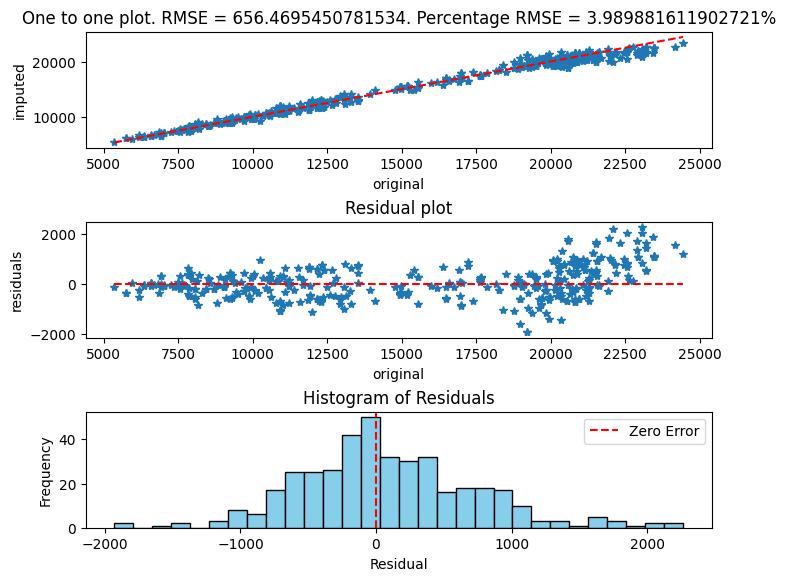

In [14]:
#create the cissa object
cissa_object_L_72 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_72.pre_fill_gaps(L = 12*6,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_72.figures.get('cissa').get('figure_gap_fill_error')

In [15]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_72.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_72.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_72.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_72.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_72.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_72.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_72.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_72.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_72.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_72.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8269.729260411164 percentage error =  4.728816612391837
true:  11537.2 , imputed:  10979.123693437758 percentage error =  4.8371901896668446
true:  17861.48079 , imputed:  17169.259108793285 percentage error =  3.8754999618747528
true:  20942.10015 , imputed:  19644.930043891374 percentage error =  6.1940784201083305
true:  20808.25338 , imputed:  20342.76505635251 percentage error =  2.2370369830987173


## L = 84 (7 years)

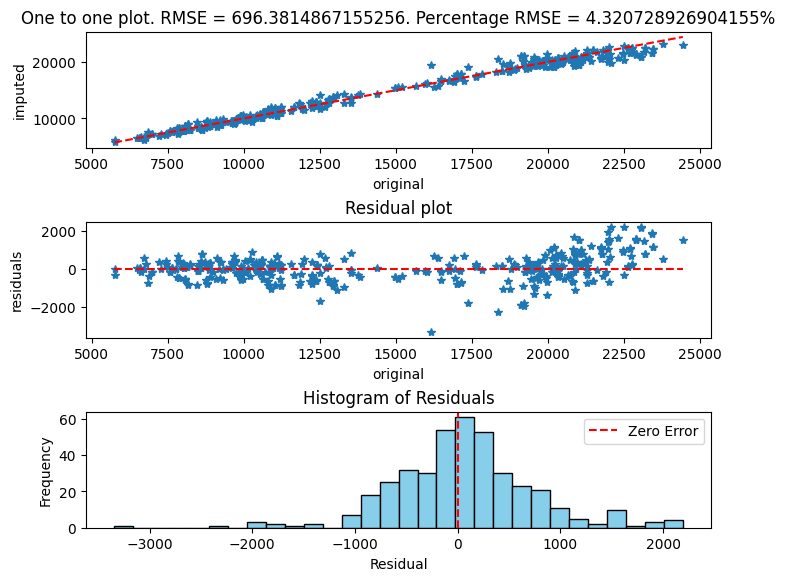

In [16]:
#create the cissa object
cissa_object_L_84 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_84.pre_fill_gaps(L = 12*7,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_84.figures.get('cissa').get('figure_gap_fill_error')

In [17]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_84.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_84.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_84.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_84.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_84.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_84.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_84.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_84.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_84.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_84.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8295.78775315669 percentage error =  4.428610479520179
true:  11537.2 , imputed:  10980.373274533651 percentage error =  4.826359302658788
true:  17861.48079 , imputed:  17250.85922016827 percentage error =  3.4186503180273657
true:  20942.10015 , imputed:  19508.845787638325 percentage error =  6.843890307542403
true:  20808.25338 , imputed:  20368.836638799094 percentage error =  2.1117425531892704


## L = 96 (8 years)

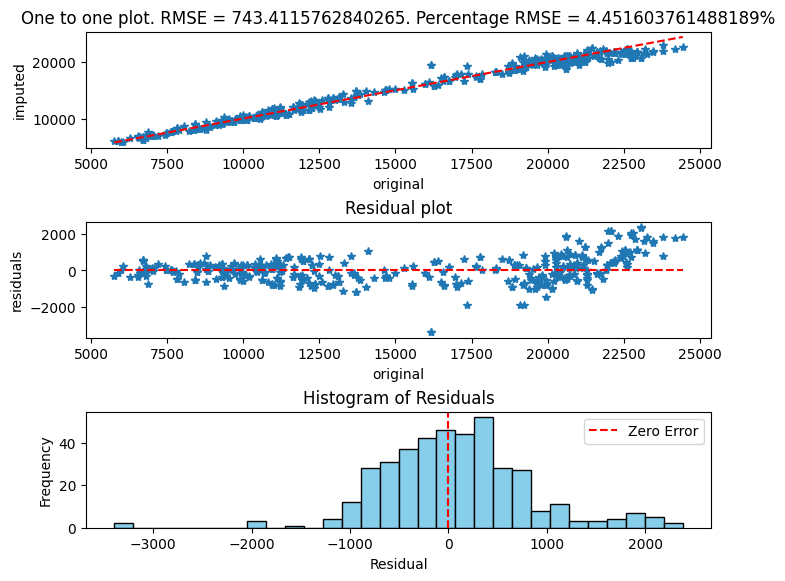

In [18]:
#create the cissa object
cissa_object_L_96 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_96.pre_fill_gaps(L = 12*8,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_96.figures.get('cissa').get('figure_gap_fill_error')

In [19]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_96.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_96.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_96.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_96.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_96.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_96.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_96.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_96.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_96.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_96.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8317.160394303954 percentage error =  4.182387568213257
true:  11537.2 , imputed:  10994.110693583469 percentage error =  4.707288652502617
true:  17861.48079 , imputed:  17332.639412018194 percentage error =  2.9607924684379285
true:  20942.10015 , imputed:  19376.28634988142 percentage error =  7.476870938937707
true:  20808.25338 , imputed:  20387.57373825558 percentage error =  2.021696074446863


## L = 108 (9 years)

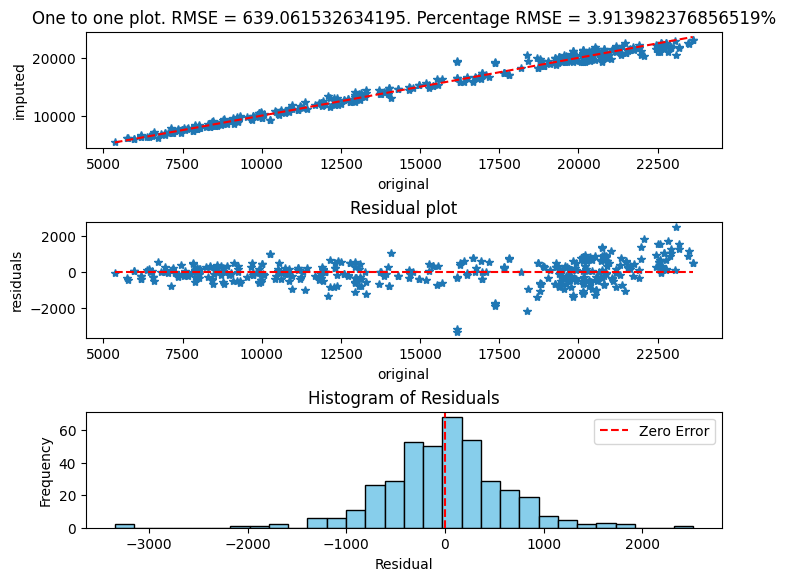

In [20]:
#create the cissa object
cissa_object_L_108 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_108.pre_fill_gaps(L = 12*9,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_108.figures.get('cissa').get('figure_gap_fill_error')

In [21]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_108.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_108.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_108.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_108.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_108.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_108.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_108.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_108.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_108.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_108.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8236.832086677452 percentage error =  5.107807577274126
true:  11537.2 , imputed:  11281.89308945618 percentage error =  2.212901835313774
true:  17861.48079 , imputed:  17311.93682359561 percentage error =  3.0766988071451578
true:  20942.10015 , imputed:  20157.149185716553 percentage error =  3.74819601979339
true:  20808.25338 , imputed:  20634.034679353965 percentage error =  0.8372576855176374


## L = 120 (10 years)

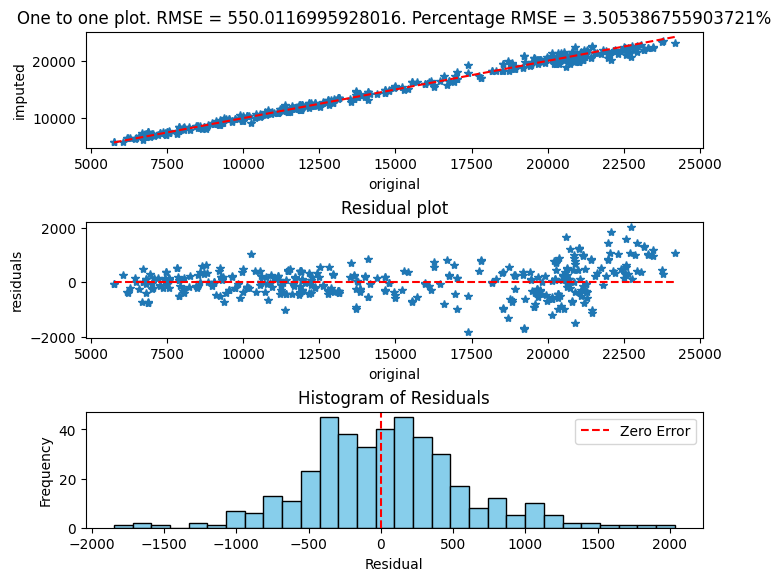

In [22]:
#create the cissa object
cissa_object_L_120 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_120.pre_fill_gaps(L = 12*10,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_120.figures.get('cissa').get('figure_gap_fill_error')

In [23]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_120.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_120.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_120.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_120.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_120.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_120.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_120.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_120.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_120.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_120.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8234.425262153018 percentage error =  5.135535331524424
true:  11537.2 , imputed:  11285.874540744388 percentage error =  2.1783921510904998
true:  17861.48079 , imputed:  17311.511105605532 percentage error =  3.079082248893818
true:  20942.10015 , imputed:  20186.48421225224 percentage error =  3.6081192064577143
true:  20808.25338 , imputed:  20585.555053701944 percentage error =  1.070240361990699


## L = 132 (11 years)

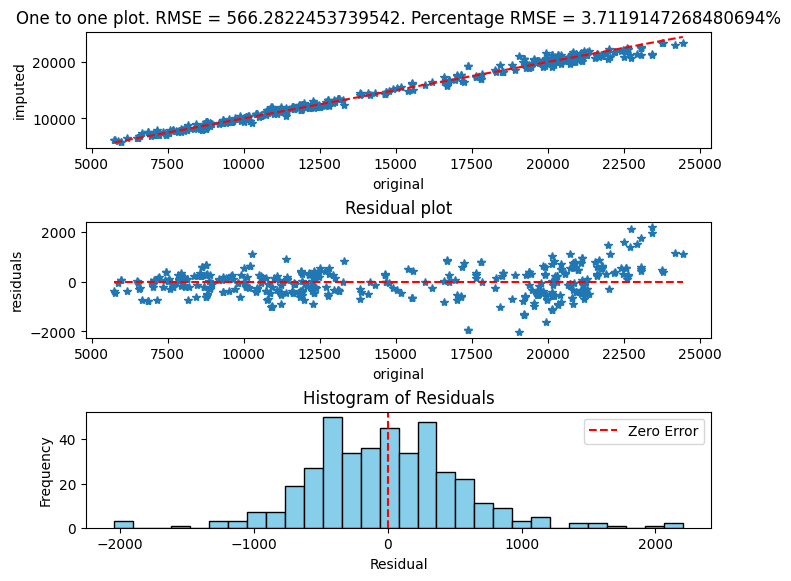

In [24]:
#create the cissa object
cissa_object_L_132 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_132.pre_fill_gaps(L = 12*11,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_132.figures.get('cissa').get('figure_gap_fill_error')

In [25]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_132.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_132.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_132.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_132.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_132.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_132.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_132.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_132.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_132.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_132.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8218.012110548949 percentage error =  5.324622583017118
true:  11537.2 , imputed:  11282.662429223828 percentage error =  2.2062334949222713
true:  17861.48079 , imputed:  17281.821995234495 percentage error =  3.24530088843494
true:  20942.10015 , imputed:  20192.564659966956 percentage error =  3.579084641293926
true:  20808.25338 , imputed:  20518.74587311306 percentage error =  1.391310945709646


## L = 144 (12 years)

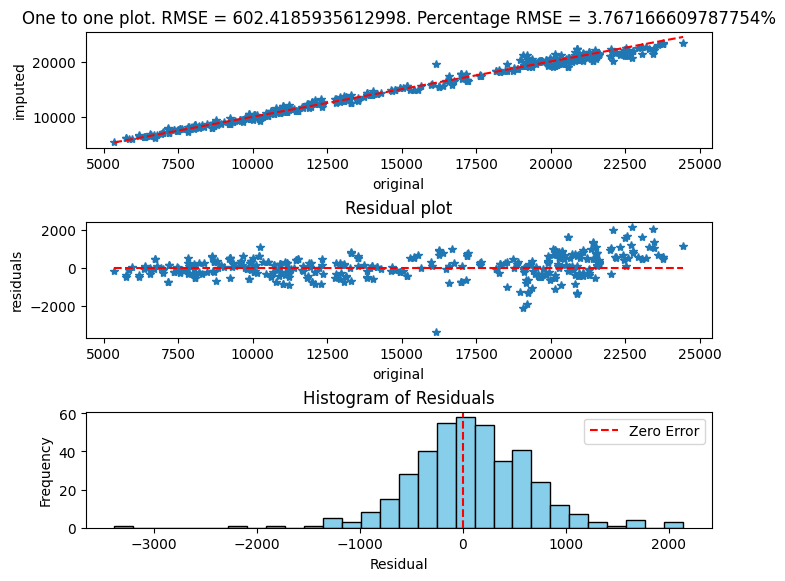

In [26]:
#create the cissa object
cissa_object_L_144 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_144.pre_fill_gaps(L = 12*12,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_144.figures.get('cissa').get('figure_gap_fill_error')

In [27]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_144.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_144.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_144.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_144.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_144.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_144.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_144.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_144.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_144.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_144.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8207.312036230884 percentage error =  5.4478924882965485
true:  11537.2 , imputed:  11273.065906919497 percentage error =  2.289412449125469
true:  17861.48079 , imputed:  17247.478292044427 percentage error =  3.4375789173052915
true:  20942.10015 , imputed:  20168.085939416807 percentage error =  3.6959722522537506
true:  20808.25338 , imputed:  20434.554458445866 percentage error =  1.7959168159366798


## L = 156 (13 years)

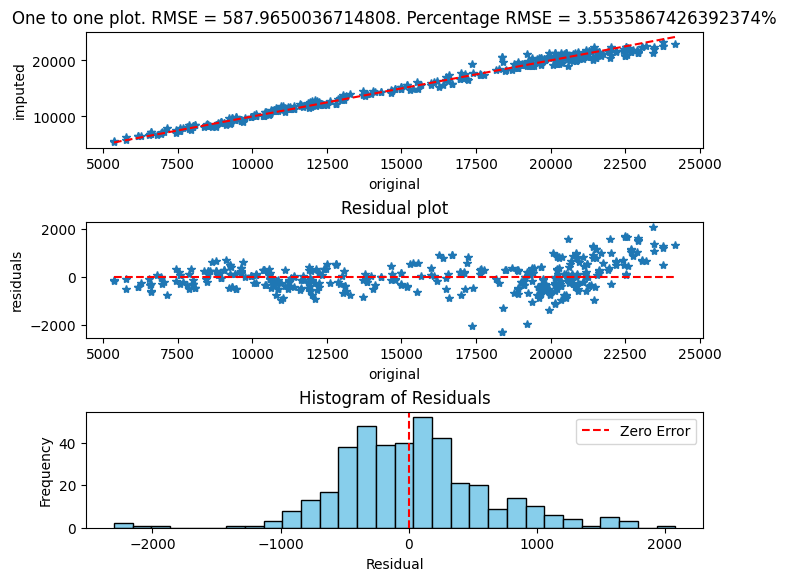

In [28]:
#create the cissa object
cissa_object_L_156 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_156.pre_fill_gaps(L = 12*13,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_156.figures.get('cissa').get('figure_gap_fill_error')

In [29]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_156.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_156.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_156.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_156.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_156.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_156.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_156.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_156.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_156.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_156.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8210.1278423434 percentage error =  5.415453073161921
true:  11537.2 , imputed:  11268.074935932515 percentage error =  2.3326722607520556
true:  17861.48079 , imputed:  17201.916261637012 percentage error =  3.6926643211589467
true:  20942.10015 , imputed:  20106.954883242837 percentage error =  3.9878773416961297
true:  20808.25338 , imputed:  20348.1463538049 percentage error =  2.211175622444766


## L = 168 (14 years)

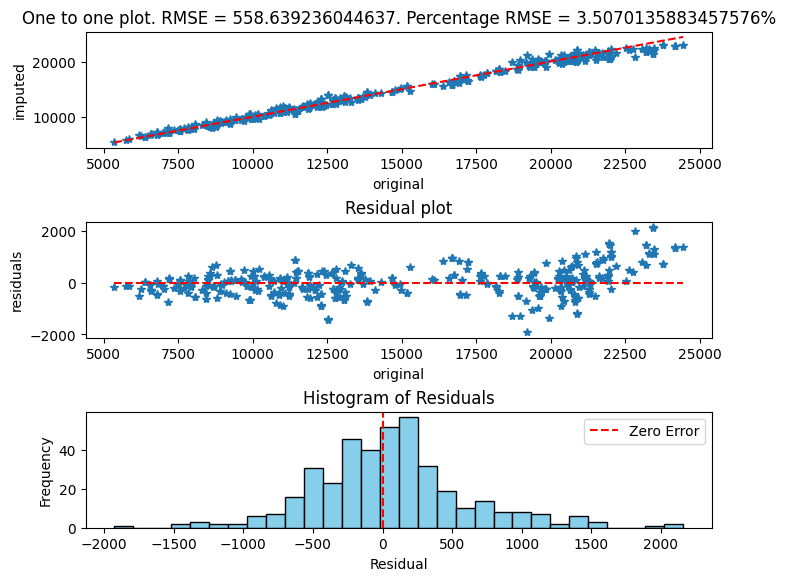

In [30]:
#create the cissa object
cissa_object_L_168 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_168.pre_fill_gaps(L = 12*14,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_168.figures.get('cissa').get('figure_gap_fill_error')

In [31]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_168.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_168.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_168.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_168.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_168.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_168.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_168.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_168.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_168.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_168.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8223.492916986183 percentage error =  5.261481106585311
true:  11537.2 , imputed:  11263.76658105873 percentage error =  2.3700154191768465
true:  17861.48079 , imputed:  17153.012164382733 percentage error =  3.9664607539925476
true:  20942.10015 , imputed:  20047.320749579965 percentage error =  4.272634520946235
true:  20808.25338 , imputed:  20267.389580965217 percentage error =  2.5992753411712903


## L = 180 (15 years)

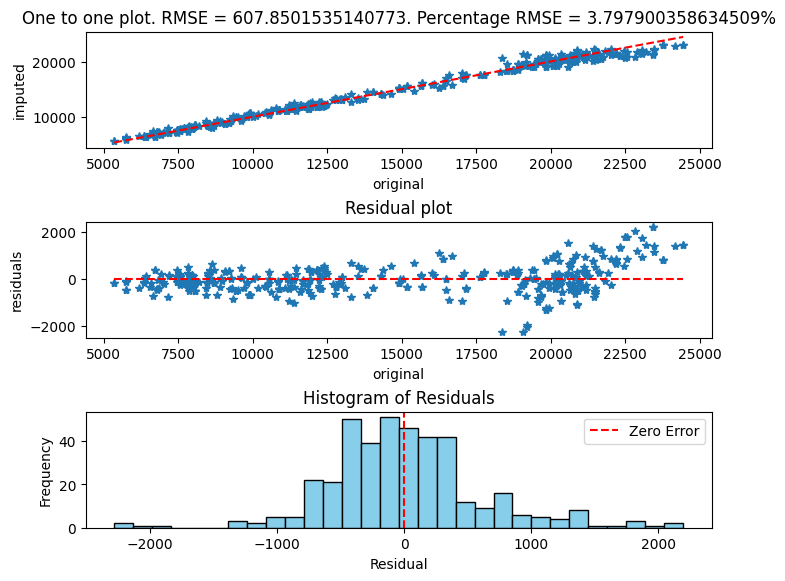

In [32]:
#create the cissa object
cissa_object_L_180 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_180.pre_fill_gaps(L = 12*15,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_180.figures.get('cissa').get('figure_gap_fill_error')

In [33]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_180.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_180.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_180.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_180.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_180.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_180.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_180.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_180.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_180.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_180.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8248.18350295125 percentage error =  4.977033905310376
true:  11537.2 , imputed:  11251.959343815135 percentage error =  2.472355997857935
true:  17861.48079 , imputed:  17112.814166900076 percentage error =  4.191514868795631
true:  20942.10015 , imputed:  20000.50874951012 percentage error =  4.496165111166642
true:  20808.25338 , imputed:  20185.554713772857 percentage error =  2.992556149982547


## L = 196 (16 years)

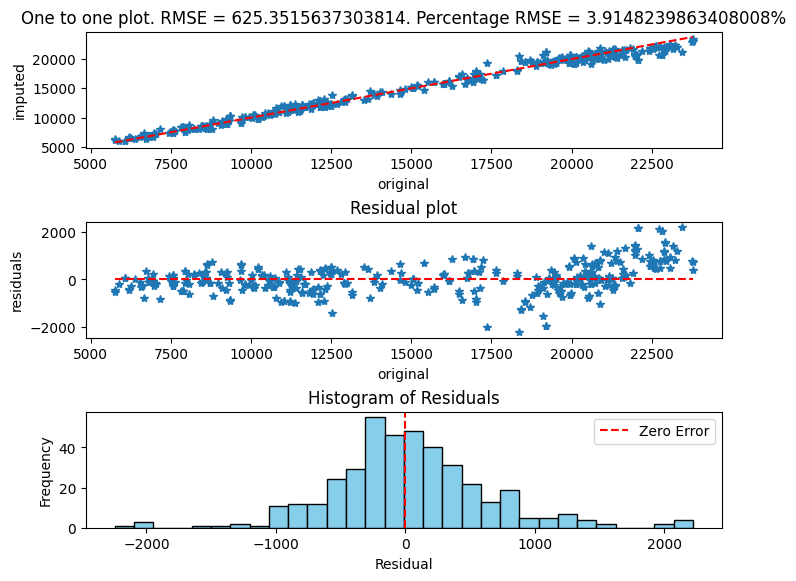

In [34]:
#create the cissa object
cissa_object_L_196 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_196.pre_fill_gaps(L = 12*16,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_196.figures.get('cissa').get('figure_gap_fill_error')

In [35]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_196.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_196.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_196.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_196.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_196.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_196.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_196.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_196.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_196.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_196.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8285.141426247517 percentage error =  4.5512611892869215
true:  11537.2 , imputed:  11237.132552741283 percentage error =  2.600868904575789
true:  17861.48079 , imputed:  17091.21054820118 percentage error =  4.312465751608168
true:  20942.10015 , imputed:  19969.29278838409 percentage error =  4.645223519360875
true:  20808.25338 , imputed:  20112.307453389065 percentage error =  3.344566763493215


## L = 240 (20 years)

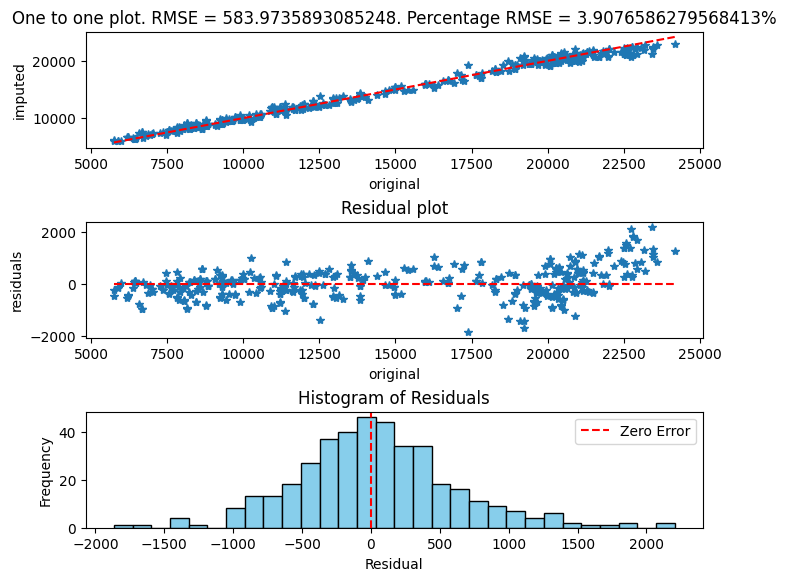

In [36]:
#create the cissa object
cissa_object_L_240 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_240.pre_fill_gaps(L = 12*20,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_240.figures.get('cissa').get('figure_gap_fill_error')

In [37]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_240.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_240.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_240.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_240.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_240.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_240.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_240.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_240.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_240.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_240.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8361.491849731403 percentage error =  3.671668282627103
true:  11537.2 , imputed:  11190.0345231687 percentage error =  3.0090964604176063
true:  17861.48079 , imputed:  17258.388823493504 percentage error =  3.3764947800080884
true:  20942.10015 , imputed:  20381.95735226023 percentage error =  2.6747212253197485
true:  20808.25338 , imputed:  20296.01711074227 percentage error =  2.461697576933917


## L = half the time-series length (23 years)

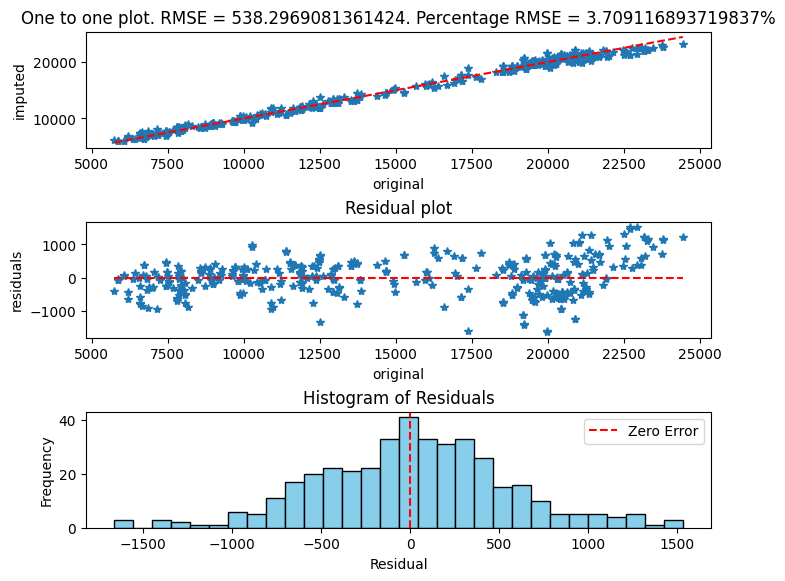

In [38]:
#create the cissa object
cissa_object_L_276 = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])
cissa_object_L_276.pre_fill_gaps(L = 12*23,
                       K_surrogates = 3, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 1000, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value    
                        verbose = False    
                       )
cissa_object_L_276.figures.get('cissa').get('figure_gap_fill_error')

In [39]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_L_276.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_L_276.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_L_276.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_L_276.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_L_276.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_L_276.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_L_276.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_L_276.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_L_276.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_L_276.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8339.8370815541 percentage error =  3.9211414304497647
true:  11537.2 , imputed:  11262.028486291894 percentage error =  2.3850805542775233
true:  17861.48079 , imputed:  17335.08228618704 percentage error =  2.9471156955120588
true:  20942.10015 , imputed:  20418.39675578045 percentage error =  2.5007205125964815
true:  20808.25338 , imputed:  20524.297196316034 percentage error =  1.3646324777883108


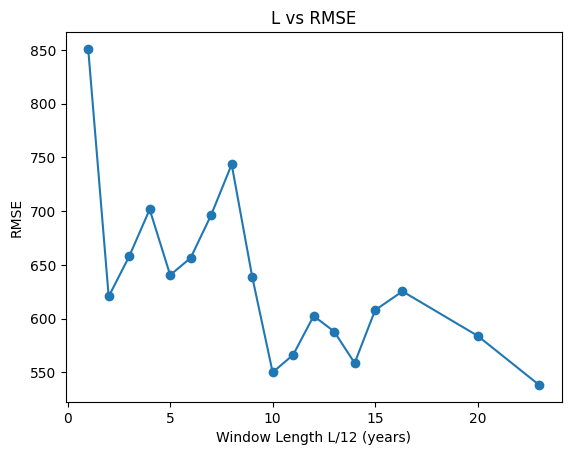

In [40]:
import matplotlib.pyplot as plt
# Create the plot
plt.plot([x/12 for x in [12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,196, 240, 276]], 
         [cissa_object_L_12.gap_fill_error_rmse, 
         cissa_object_L_24.gap_fill_error_rmse,
         cissa_object_L_36.gap_fill_error_rmse,
         cissa_object_L_48.gap_fill_error_rmse,
         cissa_object_L_60.gap_fill_error_rmse,
         cissa_object_L_72.gap_fill_error_rmse,
         cissa_object_L_84.gap_fill_error_rmse,
          cissa_object_L_96.gap_fill_error_rmse,
          cissa_object_L_108.gap_fill_error_rmse,
          cissa_object_L_120.gap_fill_error_rmse,
          cissa_object_L_132.gap_fill_error_rmse,
          cissa_object_L_144.gap_fill_error_rmse,
          cissa_object_L_156.gap_fill_error_rmse,
          cissa_object_L_168.gap_fill_error_rmse,
          cissa_object_L_180.gap_fill_error_rmse,
          cissa_object_L_196.gap_fill_error_rmse,
          cissa_object_L_240.gap_fill_error_rmse,
          cissa_object_L_276.gap_fill_error_rmse,
         ], 
         marker='o')  # Line plot with circle markers

# Add labels and title
plt.xlabel('Window Length L/12 (years)')
plt.ylabel('RMSE')
plt.title('L vs RMSE')

# Show the plot
plt.show()

## In this particular case, it seems using a window length L = N/2 is best to minimise RMSE.

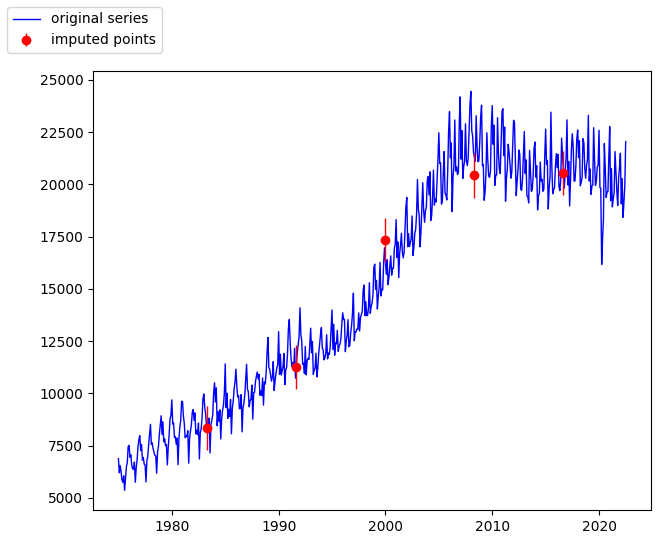

In [42]:
cissa_object_L_276.figures.get('cissa').get('figure_gap_fill')